In [130]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
import scipy.interpolate as interpolate

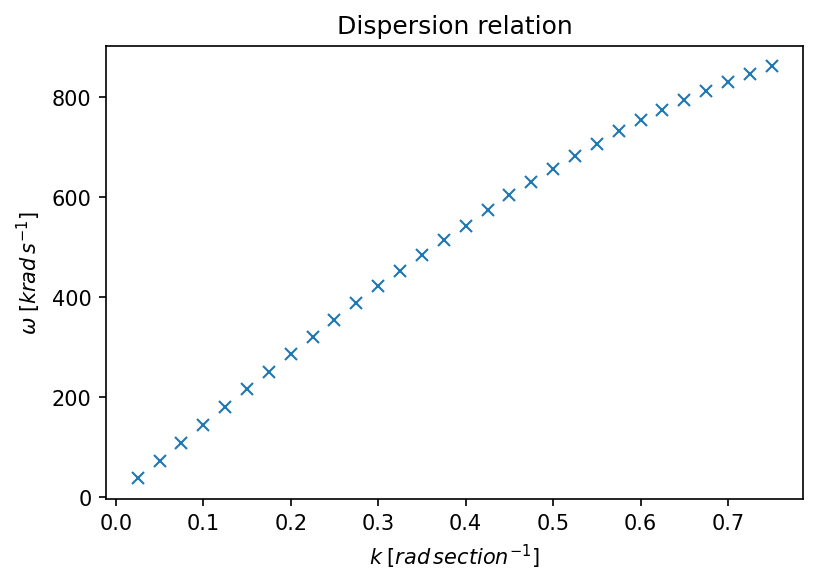

In [131]:
# Dispersion relation

data = np.loadtxt("waves_3_7_data.csv", delimiter=",", skiprows=1).transpose()

k_arr = data[0]/40
omega_arr = 2*np.pi*data[1]

plt.title("Dispersion relation")
plt.plot(k_arr, omega_arr, 'x')
plt.xlabel("$k\;[rad\,section^{-1}]$")
plt.ylabel("$\omega\;[krad\,s^{-1}]$")
plt.show()

In [134]:
# Interpolate dispersion relation
cs = interpolate.CubicSpline(k_arr, omega_arr)
def vp(k):
    if k == 0:
        return 0
    return cs(k)/k

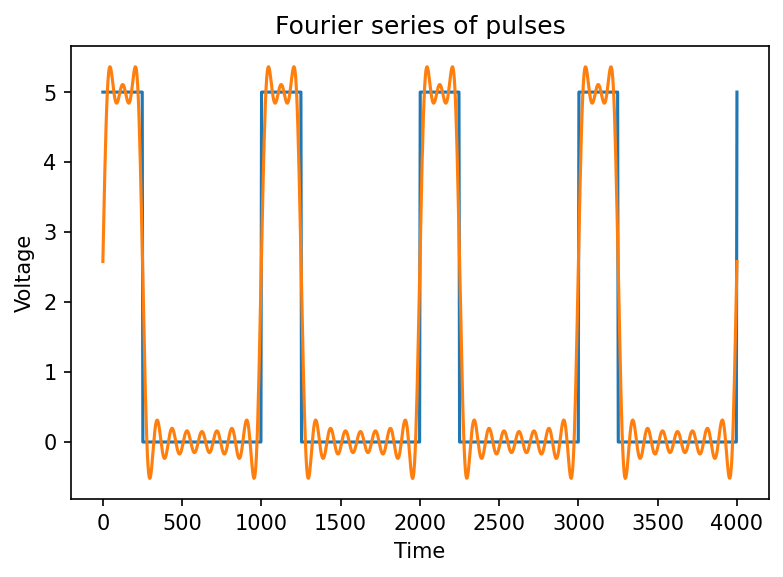

In [138]:
# Fourier series
duty = 4
period = 1000

xs = np.linspace(0, period*4, 1000)
ys = [5*(1 - bool(int((4*p/period + duty)%duty))) for p in xs]

n_max = 10
a = np.append(np.array([5/duty]), [5*(np.sin(np.pi*n/2))/(np.pi*n) for n in range(1, n_max+1)])
b = np.append(np.array([0]), [5*(1-np.cos(np.pi*n/2))/(np.pi*n) for n in range(1, n_max+1)])

fs = lambda x: sum([a[n]*np.cos(2*np.pi*n*x/period) + b[n]*np.sin(2*np.pi*n*x/period) for n in range(n_max+1)])
y_fourier = fs(xs)

plt.title("Fourier series of pulses")
plt.plot(xs, ys)
plt.plot(xs, y_fourier)
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.show()

2052.068558674652 1448.5389113532713


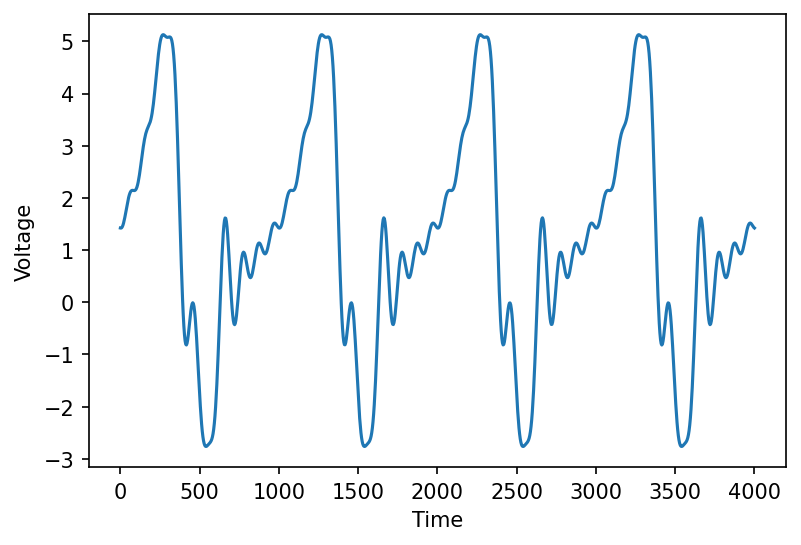

In [140]:
# Propagation
fs_prop = lambda x, t: sum([a[n]*np.cos(2*np.pi*n*(x - t*vp(2*np.pi*n/period))/period) + b[n]*np.sin(2*np.pi*n*(x - t*vp(2*np.pi*n/period))/period) for n in range(n_max+1)])

print(vp(2*np.pi*1/period), vp(2*np.pi*n_max/period))

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 150  
plt.ioff()
fig, ax = plt.subplots()

def animate(i):
    global xs
    plt.cla()
    t = i/100
    plt.plot(xs, fs_prop(xs, t))
    plt.xlabel("Time")
    plt.ylabel("Voltage")

matplotlib.animation.FuncAnimation(fig, animate, frames=100)


#writervideo = matplotlib.animation.PillowWriter(fps=10)
#anim.save('distortion.gif', writer=writervideo)
#plt.close()